In [2]:
"""
This is a jupyter notebook to explore RESOLVE and ECO. My mini-project will be to compare the u-r color 
vs. stellar mass plot for RESOLVE and ECO, knowing that the u-r color is defined differently in the two 
surveys (the ECO glossary says"modelu_rcorr" is corrected for internal extinction by the host galaxy, 
whereas the RESOLVE glossary says "modelu_r" has only "foreground corrections" meaning corrections for 
extinction by dust in our own Galaxy).
Author: Sheila Kannappan
Created: August 2016
"""

# standard imports and naming conventions; uncomment as needed
import numpy as np              # basic numerical analysis
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats     # statistical functions
from astroML.plotting import scatter_contour

%matplotlib inline

I'll obtain my ECO data with a sql query to the ECO DR1 "searchable database" linked [here](http://resolve.astro.unc.edu/pages/database.php). Note the examples of sql queries given below the database link on the [same page](http://resolve.astro.unc.edu/pages/database.php). 

To perform the query, I first switched the output choice from "browse the results of the query" to "download the results of the query (CSV)". Then I typed:

`select name, cz, logmstar, modelu_rcorr, r90, morphel, grpcz, fc, logmh, den1mpc where name != "bunnyrabbits"`

Here `!=` signifies "not equal to" and is a way of just getting everything, since none of our galaxies are named "bunnyrabbits". My sql query included a number of extra variables because I thought it would be interesting to explore other properties later.

Below I'm reading in the csv file (which I saved to the same directory as this jupyter notebook) using `np.genfromtxt`, which is more powerful than np.loadtxt and allows me to read in the column names.

In [3]:
data = np.genfromtxt("ECO_dr1_subset.csv", delimiter=",", dtype=None, names=True) # better than np.loadtxt if have column names

Look at the column names available from the csv file.

In [4]:
data.dtype.names

('NAME',
 'CZ',
 'LOGMSTAR',
 'MODELU_RCORR',
 'R90',
 'MORPHEL',
 'GRPCZ',
 'FC',
 'LOGMH',
 'DEN1MPC')

Address a column by name to see its contents.

In [5]:
data['LOGMSTAR']

array([ 10.73,   9.37,   8.19, ...,   8.97,   9.81,   9.39])

Pull out the variables for the mini-project and choose only the values that are "good" to display. (I figured out that there were some bad values by trial and error.)

In [6]:
logmstar = data['LOGMSTAR']
urcolor = data['MODELU_RCORR']
sel = np.where((urcolor > -99) & (logmstar > 0) & (logmstar > 9.))
logmstar = logmstar[sel]
urcolor = urcolor[sel]

Use the methods learned from the textbook (Fig. 1.9) to make a u-r vs. Mstars plot for ECO.

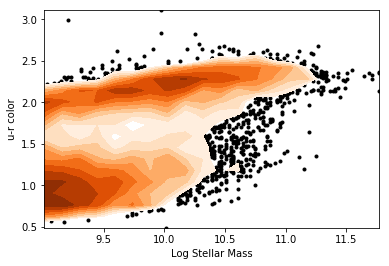

In [7]:
fig1, axcolormstar = plt.subplots()
axcolormstar = plt.axes()
#axcolormstar.plot(logmstar,urcolor,'g.')
scatter_contour(logmstar, urcolor, threshold=20, log_counts=True, ax=axcolormstar,
                histogram2d_args=dict(bins=20),
                plot_args=dict(marker='.', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.Oranges))
axcolormstar.set_xlabel("Log Stellar Mass")
axcolormstar.set_ylabel("u-r color")
#axcolormstar.plot([10.5,10.5],[min(urcolor),max(urcolor)])

To get RESOLVE data, I had to perform another very similar query in the RESOLVE DR1 sql interface, also linked [here](http://resolve.astro.unc.edu/pages/database.php). I saved the result as the csv file read in below.

In [8]:
resdata = np.genfromtxt("RESOLVE_DR1_subset.csv", delimiter=",", dtype=None, names=True)
resdata.dtype.names

IOError: RESOLVE_DR1_subset.csv not found.

In [9]:
reslogmstar = resdata['LOGMSTAR']
resurcolor_ext = resdata['MODELU_R']
ressel = np.where((resurcolor_ext > -99) & (reslogmstar > 0) & (reslogmstar > 9.))
reslogmstar = reslogmstar[ressel]
resurcolor_ext = resurcolor_ext[ressel]

NameError: name 'resdata' is not defined

Last I will overplot RESOLVE data semi-transparently to see effect of internal extinction.

In [10]:
axcolormstar.scatter(reslogmstar,resurcolor_ext,alpha=0.3,s=20,zorder=10)
fig1

NameError: name 'reslogmstar' is not defined

Wow! The red sequence hardly moved, but the blue sequence is much bluer for ECO (with the internal extinction corrections). Seems like dust is important!